Вызывается только один раз

In [1]:
!pip install open3d

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 422.5 MB 39 kB/s 
     |████████████████████████████████| 3.2 MB 37.9 MB/s 
     |████████████████████████████████| 75 kB 4.1 MB/s 
     |████████████████████████████████| 9.9 MB 46.1 MB/s 
     |████████████████████████████████| 1.6 MB 40.7 MB/s 
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.7.0
    Uninstalling nbformat-5.7.0:
      Successfully uninstalled nbformat-5.7.0
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


In [11]:
import open3d as o3d;
import numpy


mesh1 = o3d.geometry.TriangleMesh.create_sphere();
mesh2 = o3d.geometry.TriangleMesh.create_sphere();

mesh1.translate(numpy.asarray([1, 1, 1]))
mesh1.compute_vertex_normals();
mesh2.compute_vertex_normals();

o3d.visualization.draw_plotly([mesh1, mesh2])

In [2]:
import open3d as o3d; 
print(o3d.__version__)

0.16.0


Запись видео из 3D - http://www.open3d.org/docs/0.8.0/tutorial/Advanced/customized_visualization.html

In [ ]:
glb_index = 0


def custom_draw_geometry_with_camera_trajectory(pcd):
    # custom_draw_geometry_with_camera_trajectory.index = -1
    # custom_draw_geometry_with_camera_trajectory.trajectory =\
    #        o3d.io.read_pinhole_camera_trajectory(
    #                "../../TestData/camera_trajectory.json")
    #custom_draw_geometry_with_camera_trajectory.vis = o3d.visualization.Visualizer(
    #)
    if not os.path.exists("TestData/image/"):
        os.makedirs("TestData/image/")
    if not os.path.exists("TestData/depth/"):
        os.makedirs("TestData/depth/")

    def move_forward(vis):
        # This function is called within the o3d.visualization.Visualizer::run() loop
        # The run loop calls the function, then re-render
        # So the sequence in this function is to:
        # 1. Capture frame
        # 2. index++, check ending criteria
        # 3. Set camera
        # 4. (Re-render)
        ctr = vis.get_view_control()
        #glb = custom_draw_geometry_with_camera_trajectory
        if glb_index >= 0:
            print("Capture image {:05d}".format(glb_index))
            depth = vis.capture_depth_float_buffer(False)
            image = vis.capture_screen_float_buffer(False)
            plt.imsave("TestData/depth/{:05d}.png".format(glb_index),\
                    np.asarray(depth), dpi = 1)
            plt.imsave("TestData/image/{:05d}.png".format(glb_index),\
                    np.asarray(image), dpi = 1)
            #vis.capture_depth_image("depth/{:05d}.png".format(glb.index), False)
            #vis.capture_screen_image("image/{:05d}.png".format(glb.index), False)
        glb_index = glb_index + 1
        if glb_index < 100
            ctr.convert_from_pinhole_camera_parameters(
                glb.trajectory.parameters[glb.index])
        else:
            custom_draw_geometry_with_camera_trajectory.vis.\
                    register_animation_callback(None)
        return False

    vis = custom_draw_geometry_with_camera_trajectory.vis
    vis.create_window()
    vis.add_geometry(pcd)
    # vis.get_render_option().load_from_json("../../TestData/renderoption.json")
    vis.register_animation_callback(move_forward)
    vis.run()
    vis.destroy_window()

In [8]:
vis = o3d.visualization.Visualizer()
ctr = vis.get_view_control()
dir(ctr)
#init_param = ctr.convert_to_pinhole_camera_parameters()
#init_param

['__bool__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [8]:
import numpy as np
import cv2

# initialize water image
height = 500
width = 700
water_depth = np.zeros((height, width), dtype=float)

# initialize video writer
fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
fps = 30
video_filename = 'output.avi'
out = cv2.VideoWriter(video_filename, fourcc, fps, (width, height))

# new frame after each addition of water
for i in range(10):
    random_locations = np.random.random_integers(200,450, size=(200, 2))
    for item in random_locations:
        water_depth[item[0], item[1]] += 0.1
        #add this array to the video
        gray = cv2.normalize(water_depth, None, 255, 0, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
        gray_3c = cv2.merge([gray, gray, gray])
        out.write(gray_3c)

# close out the video writer
out.release()

<ipython-input-8-4abfca1d1862>:17: DeprecationWarning:

This function is deprecated. Please call randint(200, 450 + 1) instead



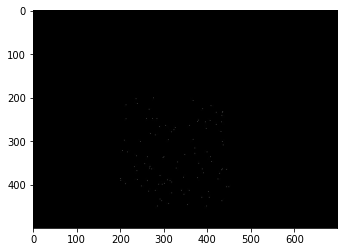

In [3]:
import cv2
import matplotlib.pyplot as plt

cap = cv2.VideoCapture("output.avi")
for i in range(1,100):
    ret, frame = cap.read()
    plt.imshow(frame)